# Problem Statement:
    
Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.datasets import load_boston

KeyboardInterrupt: 

In [ ]:
boston = load_boston()
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos.head()

In [ ]:
bos.info()

        CRIM     per capita crime rate by town
        ZN       proportion of residential land zoned for lots over 25,000 sq.ft
        INDUS    proportion of non-retail business acres per town
        CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        NOX      nitric oxides concentration (parts per 10 million)
        RM       average number of rooms per dwelling
        AGE      proportion of owner-occupied units built prior to 1940
        DIS      weighted distances to five Boston employment centres
        RAD      index of accessibility to radial highways
        TAX      full-value property-tax rate per $10,000                                                              

        PTRATIO  pupil-teacher ratio by town
        B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        LSTAT    % lower status of the population
        MEDV     Median value of owner-occupied homes in $1000's

In [17]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [3]:
bos['MEDV'] = boston.target

In [4]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [24]:
bos.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
bos['RAD'] = bos['RAD'].astype('int')
bos["CHAS"] = bos['CHAS'].astype('bool')

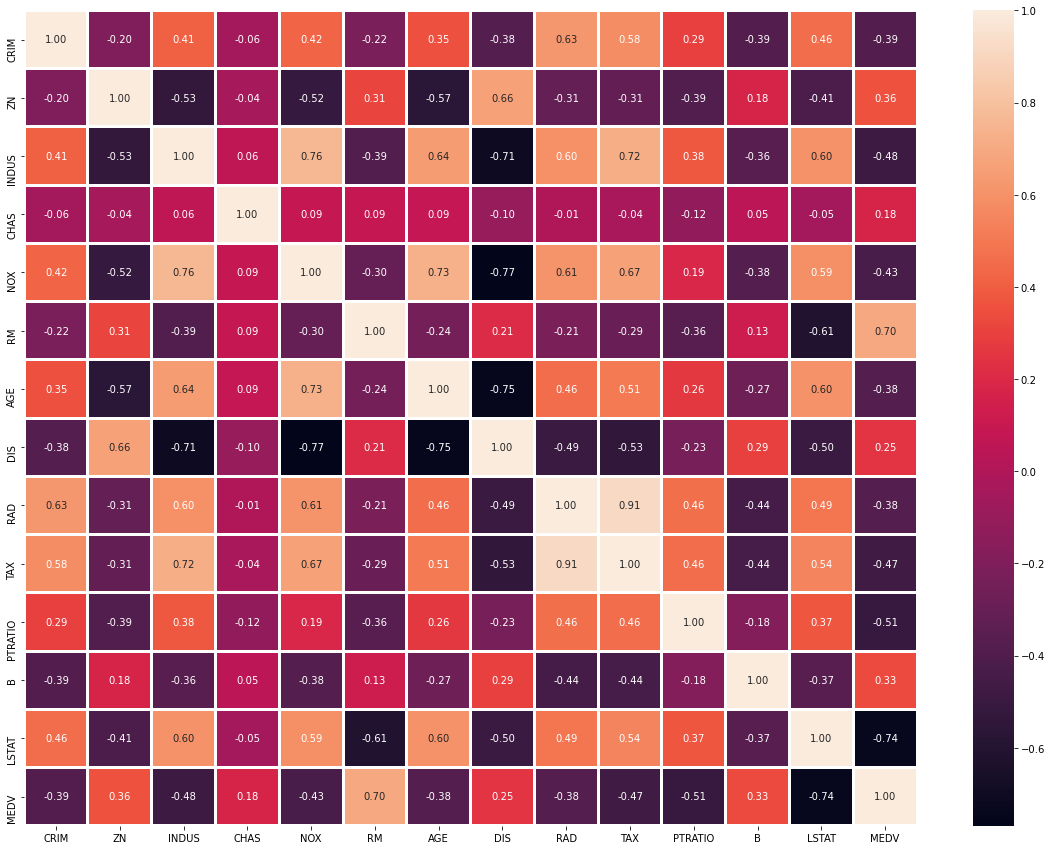

In [10]:
fig, ax = plt.subplots(figsize = (20,15))
sns.heatmap(bos.corr(), annot = True, linewidths= 2, fmt = '.2f', ax = ax)
plt.show()

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

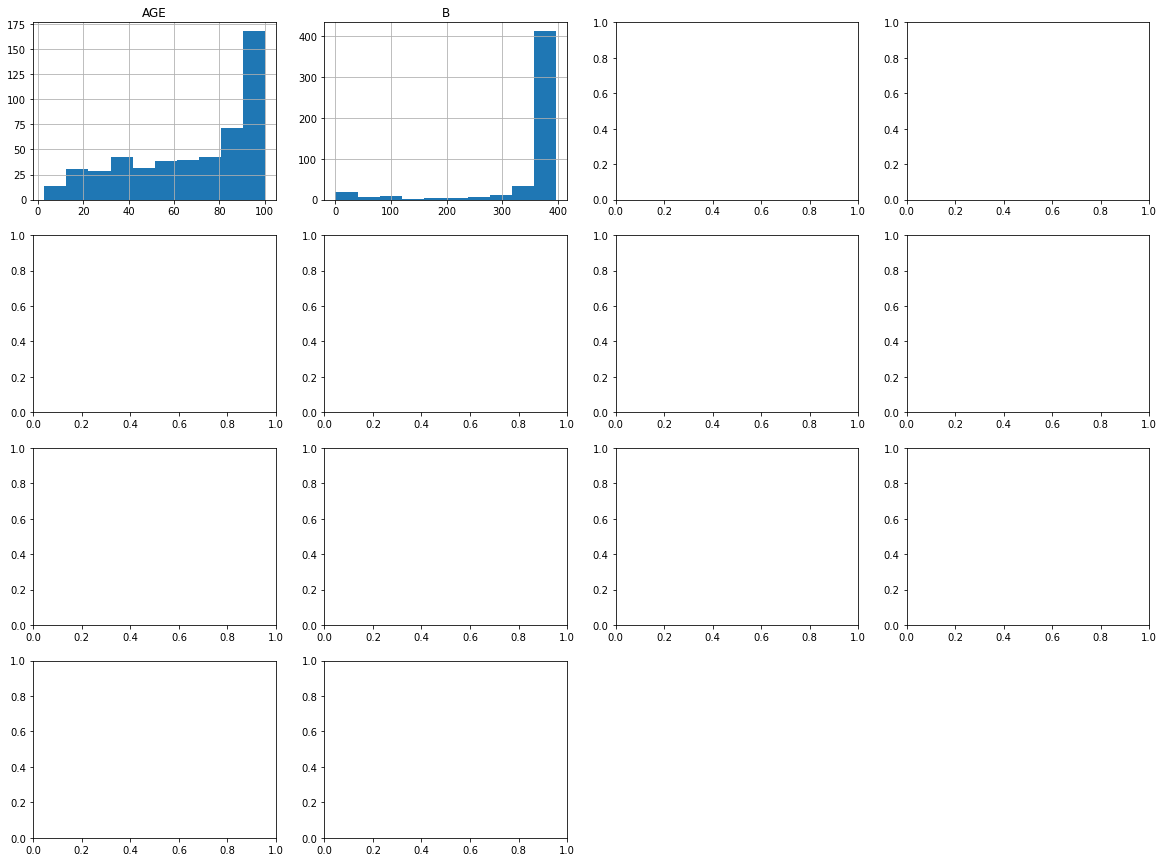

In [11]:
bos.hist(figsize = (20,15))
plt.show()

In [12]:
x = bos.drop(['MEDV'], axis = 1)
y = bos['MEDV']

In [13]:
x.shape

(506, 13)

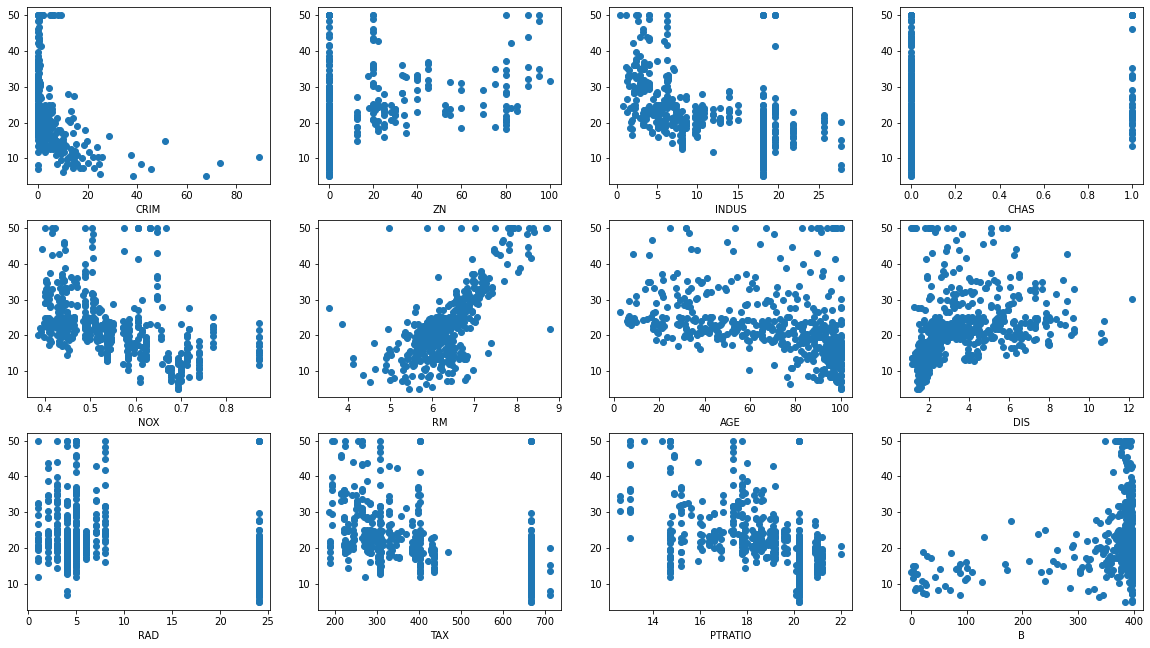

In [14]:
plt.figure(figsize = (20,15))
count = 1

for i in x:
    if count < 13:
        ax = plt.subplot(4,4, count)
        plt.scatter(x[i], y)
        plt.xlabel(i)
    count+=1
plt.show()
        

In [ ]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(x[['CHAS']], y , test_size = 0.2)

model = lr()
model.fit(X_train, y_train)

plt.figure()
plt.scatter(x[['CHAS']], y)
plt.plot(X_test[:2], model.predict(X_test[:2]))
plt.show()

In [14]:
model.predict([[0.4]])

array([25.05592276])

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
X_scaled = scaler.fit_transform(x)

In [36]:
X_scaled = pd.DataFrame(X_scaled, columns = x.columns)
X_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


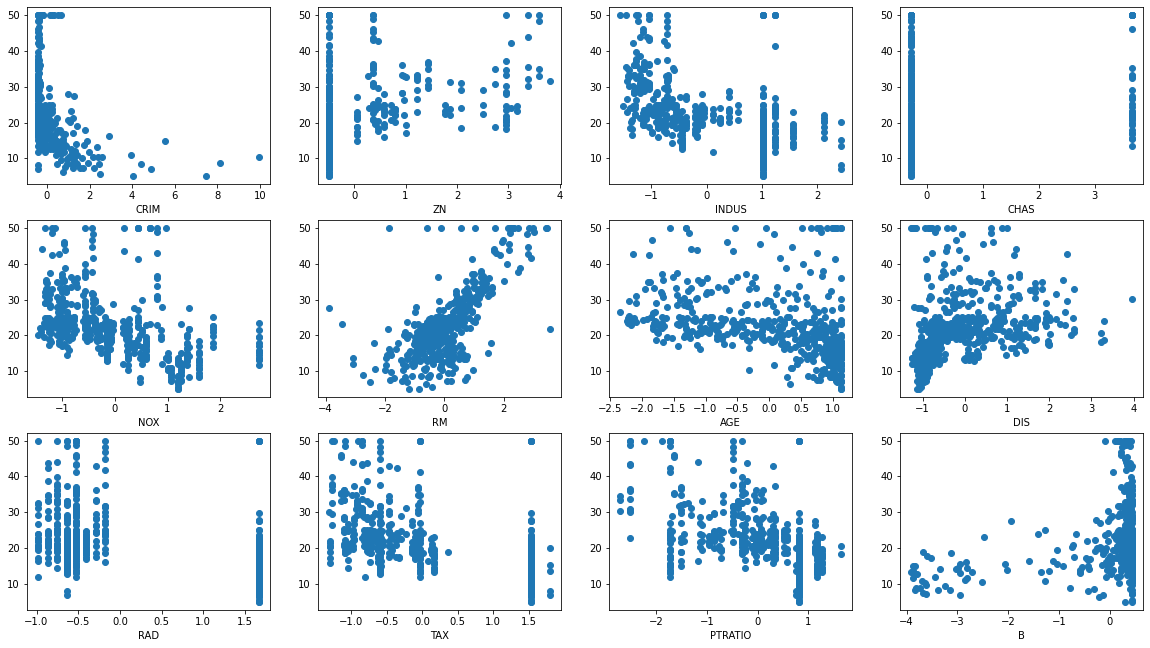

In [37]:
plt.figure(figsize = (20,15))
count = 1

for i in X_scaled:
    if count < 13:
        ax = plt.subplot(4,4, count)
        plt.scatter(X_scaled[i], y)
        plt.xlabel(i)
    count+=1
plt.show()

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y , test_size = 0.32, random_state= 42)

model = LinearRegression()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

In [52]:
print(score)

0.7171424713100232


In [53]:
model.coef_

array([-1.10470083,  0.87905078,  0.39821142,  0.80585016, -1.84802026,
        2.8577885 , -0.32303922, -2.96641232,  2.01935831, -1.37111234,
       -2.00902953,  1.08122522, -3.86228827])

In [54]:
model.score(X_train, y_train) 

0.7418584859083597

In [55]:
def adj_r2(x,y):
    r2 = model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [56]:
print(adj_r2(X_test, y_test))
print(adj_r2(X_train,y_train))

0.6922968775737415
0.7316892747471739


### Diiferent approach 
* First the dataset is split and then training and test data is scaled.

In [63]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y , test_size = 0.32, random_state= 42)

model1 = LinearRegression()

scaler1 = StandardScaler()
X_train_scaled = scaler1.fit_transform(X_train1)
X_test_scaled = scaler1.transform(X_test1)

X_train_scaled = pd.DataFrame(X_train_scaled, columns = x.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = x.columns)

model1.fit(X_train_scaled, y_train1)
score = model1.score(X_test_scaled, y_test1)
score

0.7171424713100236

In [64]:
model1.score(X_train_scaled, y_train1) 

0.7418584859083597

In [65]:
print(adj_r2(X_test_scaled, y_test1))
print(adj_r2(X_train_scaled,y_train1))

0.6812437193949308
0.7274851427378197


# Variance Inflation Factor

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = StandardScaler().fit_transform(x)

vif = pd.DataFrame()

In [73]:
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif['Features'] = x.columns

In [74]:
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


Since the value is not more than 10, therfore it means that variable are not that correlated.
Hence it can be ignored.

### Regularization

When we use regression on training data there is a good chance that the model may overfit the data. In such cases
**regularization** helps in reducing the degree of freedom for a given equation. 

In [75]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

#### Lasso

In [76]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [77]:
lasso_reg = Lasso(lasscv.alpha_)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.0003791797182342874)

In [78]:
lasso_reg.score(X_test, y_test)

0.7171275937096762

#### Ridge

In [79]:
alphas = np.random.uniform(low = 0 , high = 10, size = 50)
ridgecv = RidgeCV(alphas = alphas, cv = 10, normalize = True)
print(ridgecv.fit(X_train, y_train))
ridge_reg = Ridge(alpha = ridgecv.alpha_)
print(ridge_reg.fit(X_train, y_train))
print(ridge_reg.score(X_test,y_test))

RidgeCV(alphas=array([5.36096366, 3.09527616, 8.1379502 , 6.84731173, 1.62616939,
       9.10927184, 8.22537243, 9.49799913, 7.25719508, 6.13415196,
       4.18243036, 9.32728483, 8.6606389 , 0.4521867 , 0.26366974,
       3.76463367, 8.10553331, 9.87276129, 1.50416891, 5.94130715,
       3.80890857, 9.69914398, 8.42118923, 8.38328705, 4.6869316 ,
       4.14819502, 2.73407072, 0.56375497, 8.64722376, 8.12901009,
       9.99717673, 9.96636837, 5.55431706, 7.68987415, 9.4476573 ,
       8.49647391, 2.47348102, 4.50544135, 1.29159415, 9.54051027,
       6.06174634, 2.28642806, 6.71700684, 6.1812824 , 3.58162718,
       1.13557592, 6.71573196, 5.20307701, 7.72318392, 5.20163501]),
        cv=10, normalize=True)
Ridge(alpha=0.26366974497252005)
0.7170469562240492


#### ElasticNet

In [80]:
elasticcv = ElasticNetCV(alphas = None, cv =10 )
print(elasticcv.fit(X_train, y_train))
elastic_reg = ElasticNet(alpha = elasticcv.alpha_)
elastic_reg.fit(X_train, y_train)
print(elastic_reg.score(X_test, y_test))

ElasticNetCV(cv=10)
0.7158609713001394


### save the model

In [87]:
import pickle

filename = 'lr_model.pickle'
pickle.dump(model, open(filename, 'wb'))

In [88]:
loaded_model = pickle.load(open(filename, 'rb'))

In [89]:
loaded_model

LinearRegression()

In [90]:
loaded_model.score(X_test, y_test)

0.7171424713100232